# Exercise 5B

Classic dataset about geyser eruptions.

Each row represents an observed eruption of the Old Faithful Geyser in Yellowstone National Park. The eruptions column represents the duration of the eruption in minutes, and the waiting column represents the duration in minutes until the next eruption.

In this exercise, you will perform the following:
- Load and visualize a real 2D dataset
- Fit a Gaussian Mixture Model using sklearn
- Interpret GMM parameters (means, covariances, weights)
- Understand soft clustering via responsibilities
- Compare GMM with K-means
- Use log-likelihood and BIC for model selection

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [15]:
url = "https://gist.githubusercontent.com/hogwild/c2704a1ae38c0a36983bc13121050dac/raw/oldFaithfulGeyserDataset.csv?raw=True"

df = pd.read_csv(url)

1. Load and understand the dataset
- Inspect the first 5 rows using `.head()`
- Inspected the total number of rows and columns using `.info()`

In [16]:
# put your answer here
df.head()

,index,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      272 non-null    int64  
 1   eruptions  272 non-null    float64
 2   waiting    272 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 6.5 KB


2. Visualize the raw data
- Create a scatter plot of eruption duration vs waiting time.
- Label the axes.
- Describe the visible cluster structure.

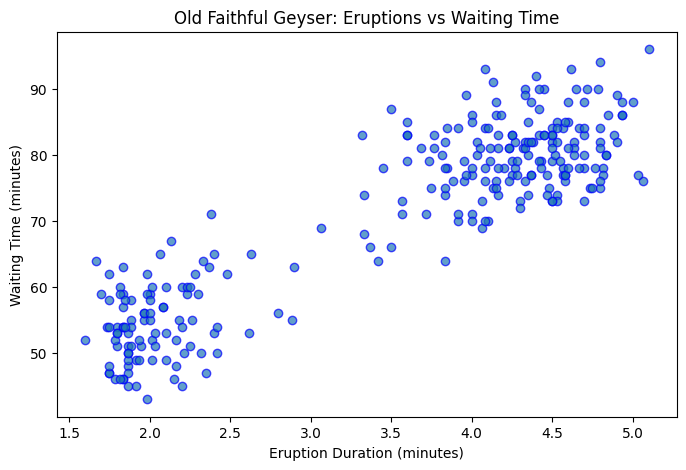

In [18]:
# put your answer here
plt.figure(figsize=(8, 5))
plt.scatter(df['eruptions'], df['waiting'], alpha=0.7, edgecolors='b')
plt.xlabel('Eruption Duration (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.title('Old Faithful Geyser: Eruptions vs Waiting Time')
plt.show()

2. Fit a 2-component GMM

Fit a GMM with:
- `n_components=2`
- `covariance_type="full"`
- `random_state=42`

In [19]:
# put your answer here
X = df[['eruptions', 'waiting']]
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(X)

GaussianMixture(n_components=2, random_state=42)

3. Inspect learned parameters

Print the following variables:
- Mixing coefficients `(gmm.weights_)`
- Means `(gmm.means_)`
- Covariance matrices `(gmm.covariances_)`

In [20]:
# put your answer here
print(f"Mixing Coefficients (Weights):\n{gmm.weights_}")
print(f"\nMeans:\n{gmm.means_}")
print(f"\nCovariance Matrices:\n{gmm.covariances_}")

Mixing Coefficients (Weights):
[0.64407255 0.35592745]

Means:
[[ 4.28977944 79.96953298]
 [ 2.03652149 54.47986018]]

Covariance Matrices:
[[[ 0.16982046  0.93871793]
  [ 0.93871793 36.02497019]]

 [[ 0.06927449  0.43627723]
  [ 0.43627723 33.70493352]]]


4. Compute cluster responsibilities
- Use `predict_proba()` to compute responsibilities.
- Select a point near the overlap region.
- Print its responsibility values.

In [21]:
# put your answer here
responsibilities = gmm.predict_proba(X)

sample_idx = 20
print(f"Data Point: {X.iloc[sample_idx].values}")
print(f"Responsibility Values: {responsibilities[sample_idx]}")

Data Point: [ 1.8 51. ]
Responsibility Values: [5.15045037e-10 9.99999999e-01]


5. Hard assignment from GMM
- Use `.predict` to convert responsibilities into hard cluster labels.

In [22]:
# put your answer here
labels_gmm = gmm.predict(X)
df['gmm_cluster'] = labels_gmm

6. Plot clusters found by GMM
- Plot the data colored by GMM cluster assignment.

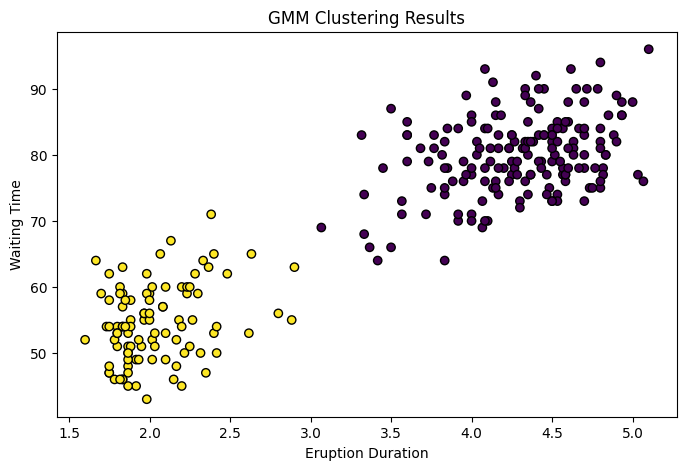

In [23]:
# put your answer here
plt.figure(figsize=(8, 5))
plt.scatter(df['eruptions'], df['waiting'], c=df['gmm_cluster'], cmap='viridis', marker='o', edgecolors='k')
plt.xlabel('Eruption Duration')
plt.ylabel('Waiting Time')
plt.title('GMM Clustering Results')
plt.show()

7. Compare with K-means
- Fit K-means with k=2 and plot the result.

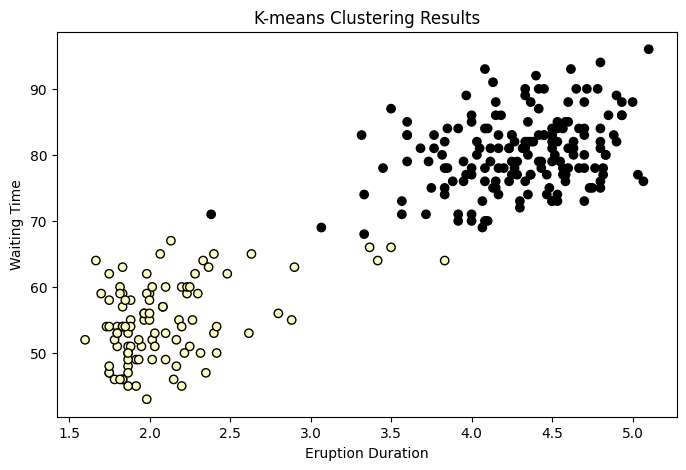

In [24]:
# put your answer here
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
labels_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(8, 5))
plt.scatter(df['eruptions'], df['waiting'], c=labels_kmeans, cmap='magma', marker='o', edgecolors='k')
plt.xlabel('Eruption Duration')
plt.ylabel('Waiting Time')
plt.title('K-means Clustering Results')
plt.show()

8. Log-likelihood of the data
- Compute the average log-likelihood under the model.

In [25]:
# put your answer here
avg_log_likelihood = gmm.score(X)
print(f"Average Log-Likelihood: {avg_log_likelihood:.4f}")

Average Log-Likelihood: -4.1554


9. Model selection with BIC
- Fit GMMs with different numbers of components and compute BIC.

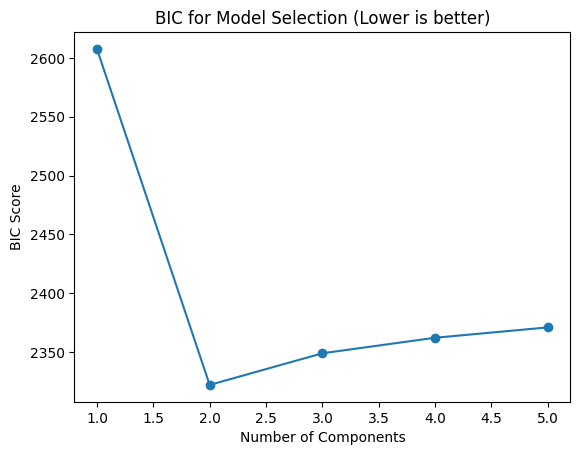

In [26]:
# put your answer here
n_components = np.arange(1, 6)
bics = []

for n in n_components:
    model = GaussianMixture(n_components=n, random_state=42).fit(X)
    bics.append(model.bic(X))

plt.plot(n_components, bics, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.title('BIC for Model Selection (Lower is better)')
plt.show()

10. Standardize the data
- Apply standardization to the dataset.
- Refit the GMM and compare results.

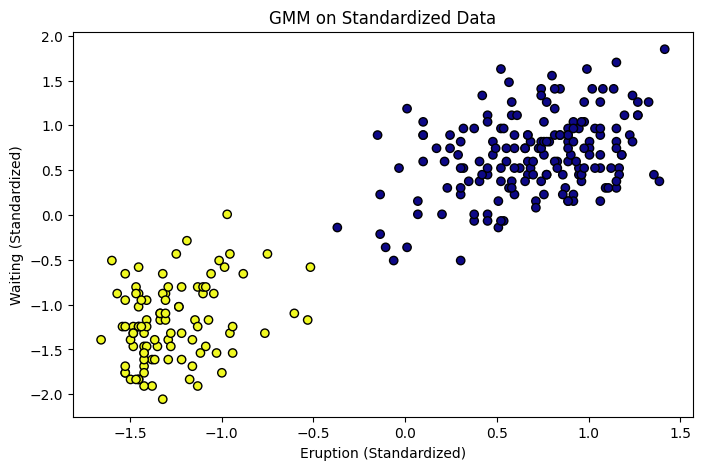

In [27]:
# put your answer here
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

gmm_scaled = GaussianMixture(n_components=2, random_state=42).fit(X_scaled)
labels_scaled = gmm_scaled.predict(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_scaled, cmap='plasma', edgecolors='k')
plt.title('GMM on Standardized Data')
plt.xlabel('Eruption (Standardized)')
plt.ylabel('Waiting (Standardized)')
plt.show()